In [16]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn


In [2]:
# Verify all required packages are installed
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

print("Python version:", sys.version)
print("\nPackage versions:")
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("xgboost:", xgb.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]

Package versions:
pandas: 2.2.2
numpy: 2.0.2
scikit-learn: 1.6.1
xgboost: 3.0.4
matplotlib: 3.10.0
seaborn: 0.13.2


In [3]:
# Check if the fraud.csv file exists
import os

file_path = r"/content/Fraud.csv"
if os.path.exists(file_path):
    print("Fraud.csv file found!")
    # Load the dataset
    df = pd.read_csv(file_path)
    print("\nDataset shape:", df.shape)
    print("\nFirst few rows of the dataset:")
    print(df.head())
else:
    print("ERROR: Fraud.csv file not found!")
    print("Please make sure the file exists at:", file_path)

Fraud.csv file found!

Dataset shape: (1805654, 11)

First few rows of the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [4]:
# Load the dataset
df = pd.read_csv(r"/content/Fraud.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nFirst few rows of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(df.describe())

Dataset Shape: (4977299, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977299 entries, 0 to 4977298
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 417.7+ MB

First few rows of the dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0



Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

Basic statistics of numerical columns:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  4.977299e+06  4.977299e+06   4.977299e+06    4.977298e+06   
mean   1.907928e+02  1.812459e+05   8.421730e+05    8.639913e+05   
std    1.035336e+02  6.441843e+05   2.921477e+06    2.958204e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.340000e+02  1.324064e+04   0.000000e+00    0.000000e+00   
50%    2.040000e+02  7.552372e+04   1.400138e+04    0.000000e+00   
75%    2.780000e+02  2.097284e+05   1.077160e+05    1.459546e+05   
max    3.520000e+02  9.244552e+07   4.381886e+07    4.368662e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    4.9

Number of duplicate rows: 0

Number of outliers in each numerical column:
amount: 261985
oldbalanceOrg: 872382
newbalanceOrig: 822764
oldbalanceDest: 607211
newbalanceDest: 568238


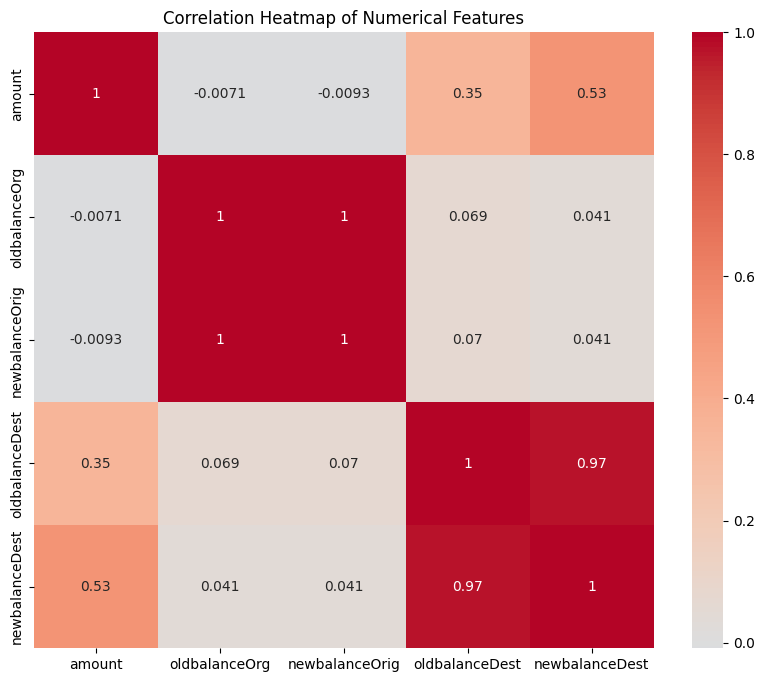


Final feature matrix shape: (4977299, 13)


In [5]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

# Check for outliers in numerical columns
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
print("\nNumber of outliers in each numerical column:")
for column in numerical_columns:
    print(f"{column}: {detect_outliers(df, column)}")

# Calculate correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Create feature matrix X and target variable y
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['type'])

# Scale numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print("\nFinal feature matrix shape:", X.shape)

Class distribution:
isFraud
0.0    0.999211
1.0    0.000789
Name: proportion, dtype: float64


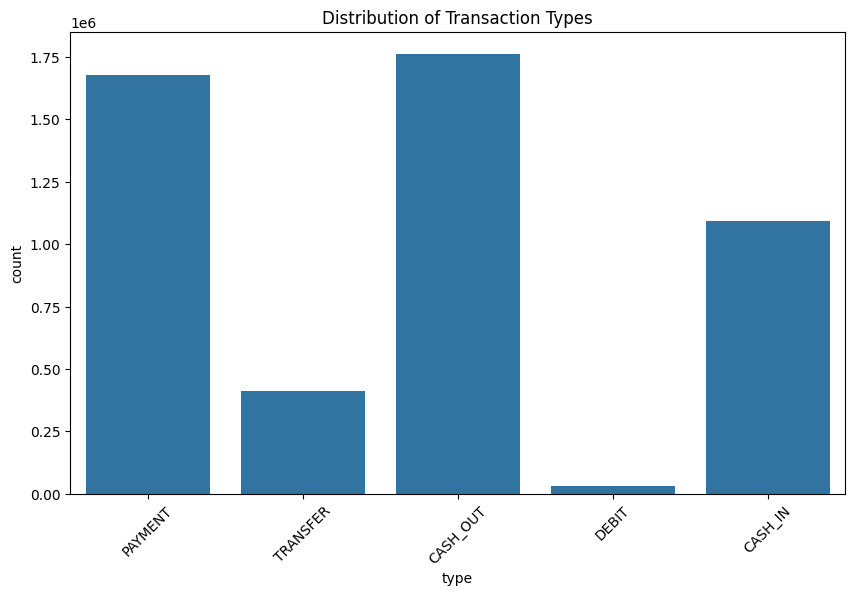

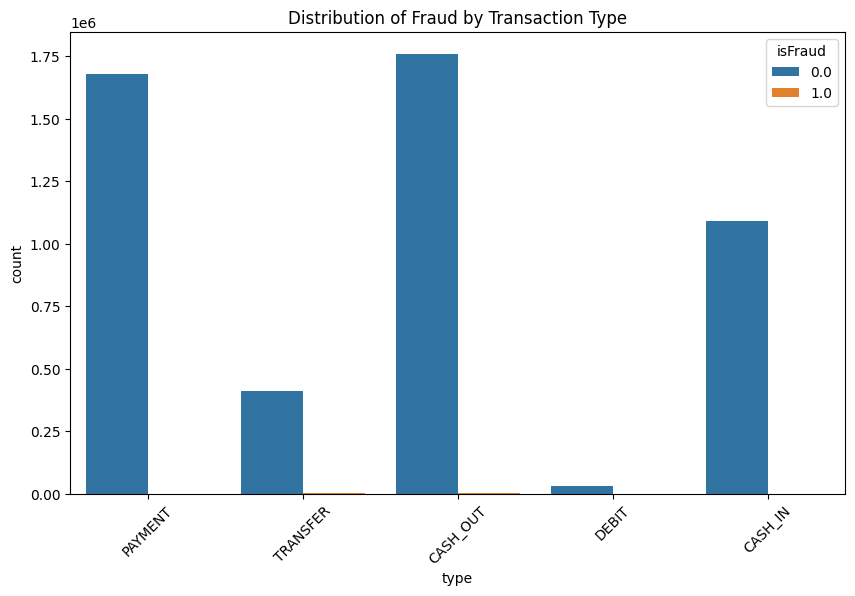

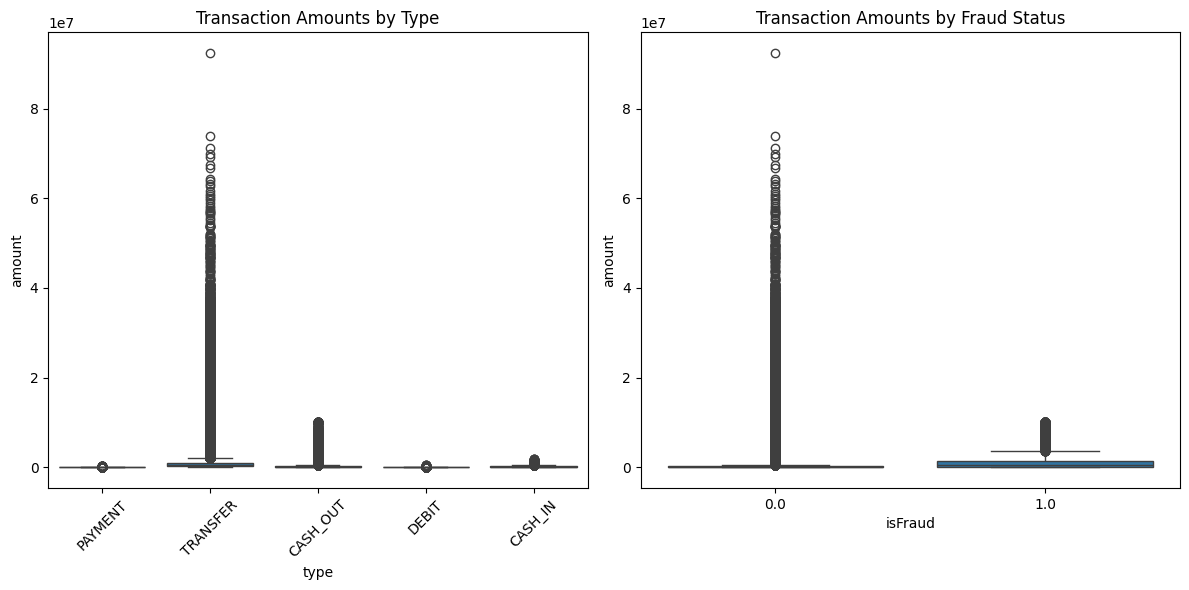

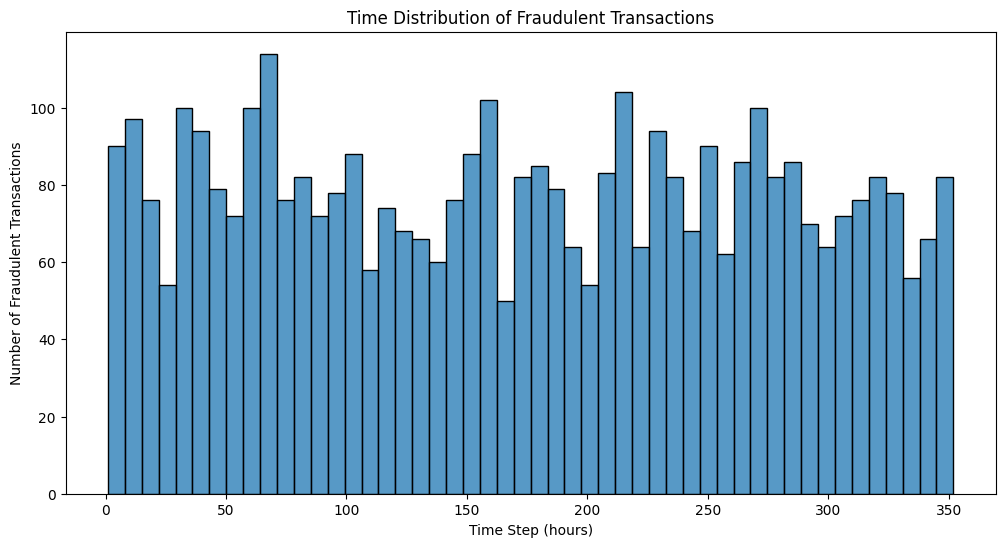


Key Statistics:
Average transaction amount: 181245.91
Average fraudulent transaction amount: 1348127.41
Percentage of transactions flagged as fraud: 0.0789%


In [6]:
# Check class distribution
print("Class distribution:")
print(df['isFraud'].value_counts(normalize=True))

# Plot transaction types distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.show()

# Plot fraud distribution by transaction type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Distribution of Fraud by Transaction Type')
plt.xticks(rotation=45)
plt.show()

# Analyze transaction amounts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='type', y='amount')
plt.title('Transaction Amounts by Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title('Transaction Amounts by Fraud Status')
plt.tight_layout()
plt.show()

# Analyze time patterns of fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['isFraud']==1], x='step', bins=50)
plt.title('Time Distribution of Fraudulent Transactions')
plt.xlabel('Time Step (hours)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

# Calculate some key statistics
print("\nKey Statistics:")
print(f"Average transaction amount: {df['amount'].mean():.2f}")
print(f"Average fraudulent transaction amount: {df[df['isFraud']==1]['amount'].mean():.2f}")
print(f"Percentage of transactions flagged as fraud: {(df['isFraud'].sum()/len(df))*100:.4f}%")

In [11]:
# Create new features
df['balance_diff_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Calculate transaction percentage of original balance
df['transaction_percentage'] = df['amount'] / df['oldbalanceOrg']
df['transaction_percentage'] = df['transaction_percentage'].replace([np.inf, -np.inf], np.nan)
df['transaction_percentage'] = df['transaction_percentage'].fillna(0)

# Create hour of day feature from step
df['hour_of_day'] = df['step'] % 24

# Create features for merchant transactions
# Fill missing values in 'isFlaggedFraud' before converting to int
df['isFlaggedFraud'] = df['isFlaggedFraud'].fillna(0).astype(int)
# Fill missing values in 'nameDest' before applying string operations
df['is_merchant'] = df['nameDest'].fillna('').str.startswith('M').astype(int)


# Update feature matrix X with new features
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1) # Keep 'isFlaggedFraud' as a feature
X = pd.get_dummies(X, columns=['type'])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                    'balance_diff_orig', 'balance_diff_dest', 'transaction_percentage']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print("Final feature set shape:", X.shape)
print("\nFeatures:", list(X.columns))

Final feature set shape: (4977299, 17)

Features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'balance_diff_orig', 'balance_diff_dest', 'transaction_percentage', 'hour_of_day', 'is_merchant', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [13]:
# Drop rows where the target variable 'isFraud' is NaN
df.dropna(subset=['isFraud'], inplace=True)

# Recreate feature matrix X and target variable y after dropping rows
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['type'])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                    'balance_diff_orig', 'balance_diff_dest', 'transaction_percentage']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Train Random Forest model
print("Training Random Forest model...")
rf_model.fit(X_train_resampled, y_train_resampled)

# Train XGBoost model
print("Training XGBoost model...")
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Calculate probabilities for ROC curves
rf_proba = rf_model.predict_proba(X_test)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print("\nModels training completed!")

Training Random Forest model...
Training XGBoost model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:33:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Models training completed!



Random Forest Performance Metrics:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    994675
         1.0       0.97      0.99      0.98       785

    accuracy                           1.00    995460
   macro avg       0.98      1.00      0.99    995460
weighted avg       1.00      1.00      1.00    995460


Confusion Matrix:


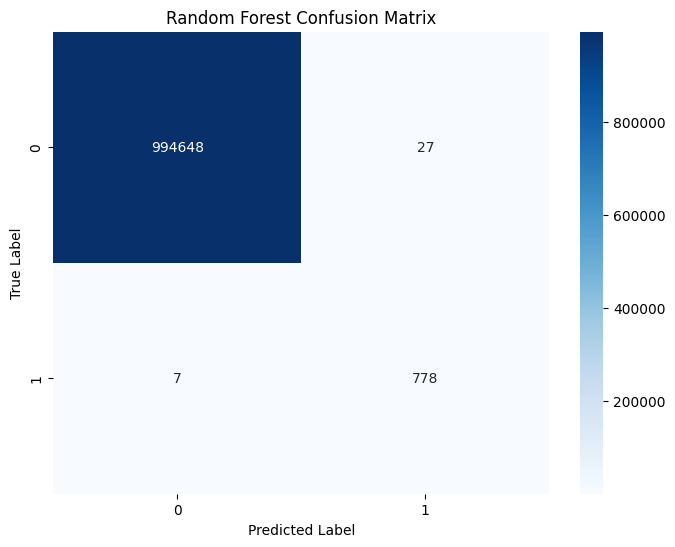

ROC-AUC Score: 0.9974

XGBoost Performance Metrics:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    994675
         1.0       0.37      0.95      0.53       785

    accuracy                           1.00    995460
   macro avg       0.68      0.98      0.76    995460
weighted avg       1.00      1.00      1.00    995460


Confusion Matrix:


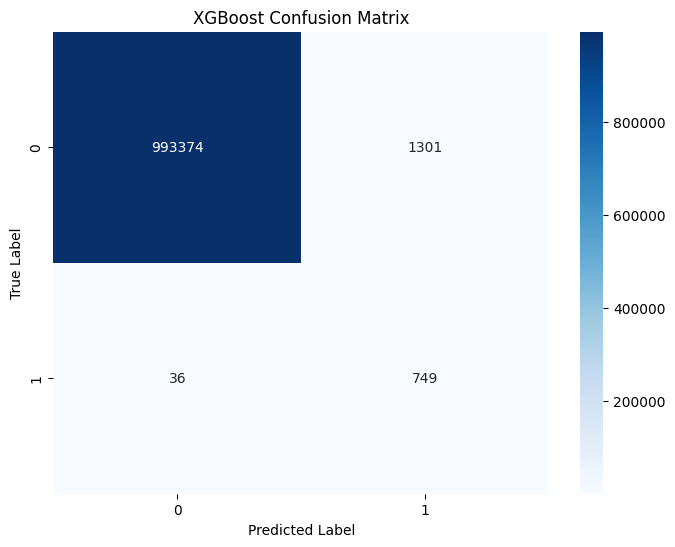

ROC-AUC Score: 0.9995


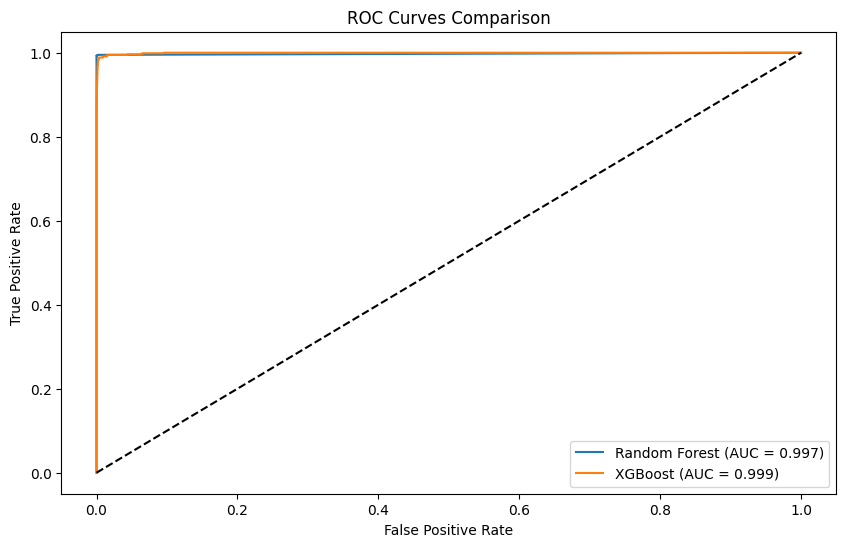

In [14]:
# Function to print model evaluation metrics
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n{model_name} Performance Metrics:")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_proba):.4f}")

# Evaluate Random Forest
evaluate_model(y_test, rf_pred, rf_proba, "Random Forest")

# Evaluate XGBoost
evaluate_model(y_test, xgb_pred, xgb_proba, "XGBoost")

# Plot ROC curves for comparison
plt.figure(figsize=(10, 6))
from sklearn.metrics import roc_curve

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_proba):.3f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_proba):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

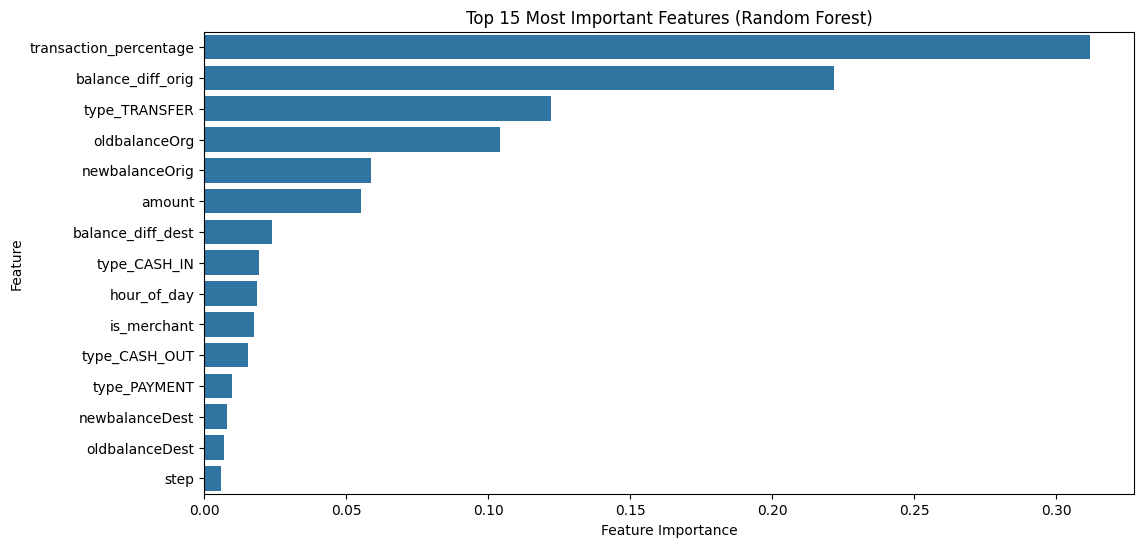

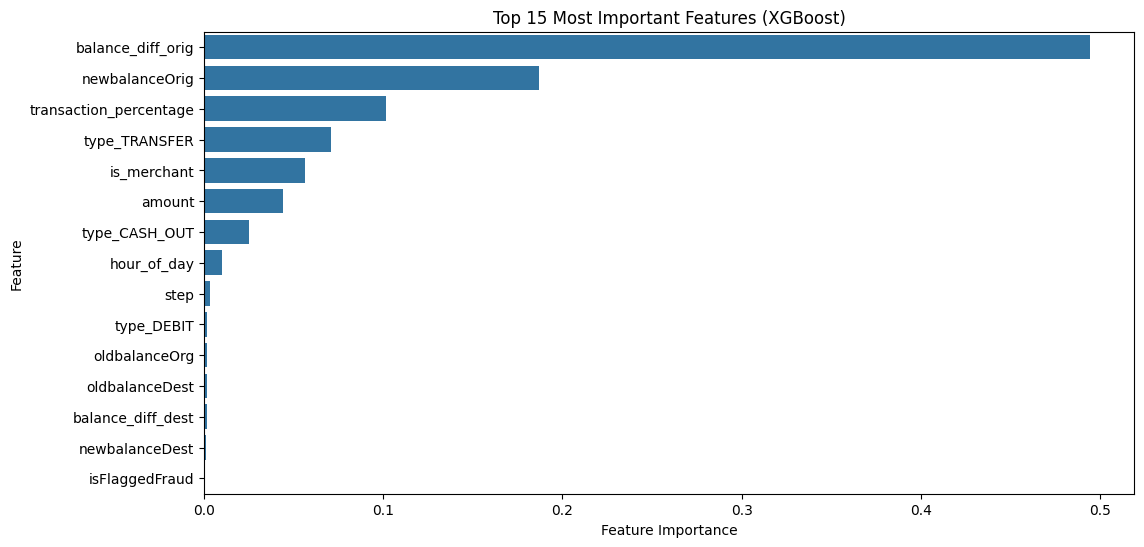

Top 10 Most Important Features (Random Forest):
                   feature  importance
9   transaction_percentage    0.311883
7        balance_diff_orig    0.221878
16           type_TRANSFER    0.122275
2            oldbalanceOrg    0.104218
3           newbalanceOrig    0.058803
1                   amount    0.055157
8        balance_diff_dest    0.023810
12            type_CASH_IN    0.019252
10             hour_of_day    0.018476
11             is_merchant    0.017726

Top 10 Most Important Features (XGBoost):
                   feature  importance
7        balance_diff_orig    0.494375
3           newbalanceOrig    0.187006
9   transaction_percentage    0.101658
16           type_TRANSFER    0.070938
11             is_merchant    0.056256
1                   amount    0.043803
13           type_CASH_OUT    0.025119
10             hour_of_day    0.009882
0                     step    0.003398
14              type_DEBIT    0.001801


In [15]:
# Get feature importance from Random Forest model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Get feature importance from XGBoost model
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
})
xgb_importance = xgb_importance.sort_values('importance', ascending=False)

# Plot XGBoost feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=xgb_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features (XGBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Print top 10 most important features for both models
print("Top 10 Most Important Features (Random Forest):")
print(feature_importance.head(10))
print("\nTop 10 Most Important Features (XGBoost):")
print(xgb_importance.head(10))